In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("product_reviews.csv")

In [3]:
# Check the first 5 rows
df.head()

,review_id,product,category,rating,review_text,feature_mentioned,attribute_mentioned,date,sentiment
0,REV14165,TechPro X20,Smartphones,4,The TechPro X20 is amazing! facial recognition...,facial recognition,design,2023-03-09,positive
1,REV81426,TechPro X20,Smartphones,4,The TechPro X20 is amazing! battery life works...,battery life,design,2023-10-28,positive
2,REV54597,SmartWatch Pro,Wearables,4,The SmartWatch Pro is amazing! app integration...,app integration,durability,2023-03-09,positive
3,REV89131,SmartSpeaker 360,Smart Home,4,Very impressed with the SmartSpeaker 360. Grea...,app interface,connectivity,2022-12-19,positive
4,REV92397,HomeConnect Hub,Smart Home,4,Very impressed with the HomeConnect Hub. Great...,device compatibility,design,2022-10-28,positive


## Data Understanding

In [4]:
# Column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   review_id            1000 non-null   object
 1   product              1000 non-null   object
 2   category             1000 non-null   object
 3   rating               1000 non-null   int64 
 4   review_text          1000 non-null   object
 5   feature_mentioned    1000 non-null   object
 6   attribute_mentioned  1000 non-null   object
 7   date                 1000 non-null   object
 8   sentiment            1000 non-null   object
dtypes: int64(1), object(8)
memory usage: 70.4+ KB


In [7]:
# Check for missing values
df.isna().sum()

,0
review_id,0
product,0
category,0
rating,0
review_text,0
feature_mentioned,0
attribute_mentioned,0
date,0
sentiment,0


In [28]:
# Checking for duplicates
df.duplicated().sum()

np.int64(0)

In [8]:
df["category"].value_counts().reset_index().sort_values("count", ascending=False )


,category,count
0,Laptops,206
1,Audio,206
2,Smartphones,201
3,Wearables,199
4,Smart Home,188


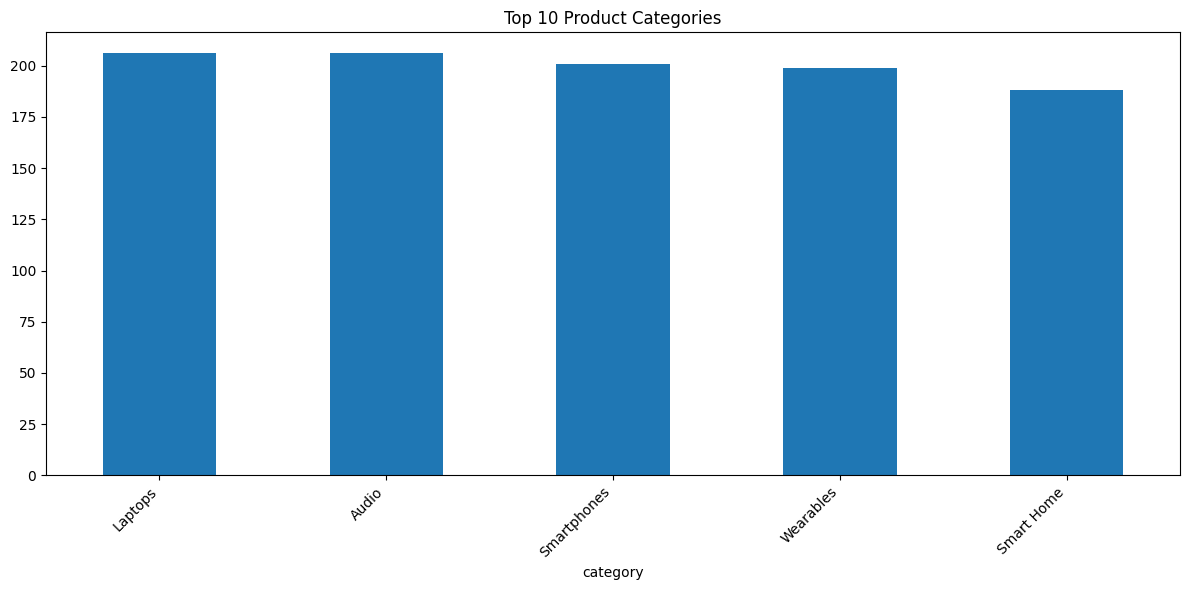

In [12]:
# Visualize top categories
plt.figure(figsize=(12, 6))
df['category'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Product Categories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [15]:
# Check the ratings distribution
df['rating'].value_counts()

,count
rating,
4,426
5,284
3,127
1,94
2,69


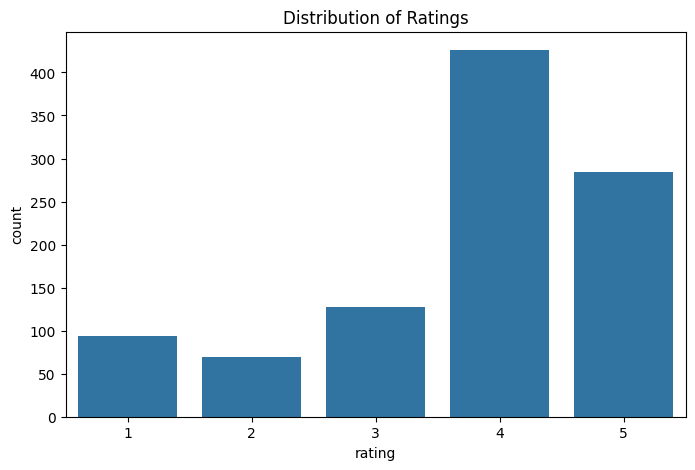

In [17]:
# Visualizing ratings distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='rating', data=df)
plt.title('Distribution of Ratings')
plt.show()

In [20]:
rating_1_df = df[df['rating'] == 1]
rating_1_df.head()

,review_id,product,category,rating,review_text,feature_mentioned,attribute_mentioned,date,sentiment
11,REV88172,BassBoost Speaker,Audio,1,"After a year of use, my BassBoost Speaker star...",sound quality,comfort,2023-03-09,negative
14,REV31174,NoiseCancel Headphones,Audio,1,Would not recommend this Audio. The NoiseCance...,microphone,comfort,2023-01-18,negative
18,REV18392,SecurityCam Pro,Smart Home,1,The SecurityCam Pro was a waste of money. Terr...,automation capabilities,responsiveness,2022-08-19,negative
20,REV73624,GalaxyWave S5,Smartphones,1,Disappointed with the GalaxyWave S5. The camer...,camera,performance,2023-11-17,negative
25,REV61173,SleepAnalyzer Band,Wearables,1,Disappointed with the SleepAnalyzer Band. The ...,app integration,accuracy,2022-01-03,negative


In [9]:
# Check the sentiments categories
df['sentiment'].value_counts()


,count
sentiment,
positive,584
neutral,253
negative,163


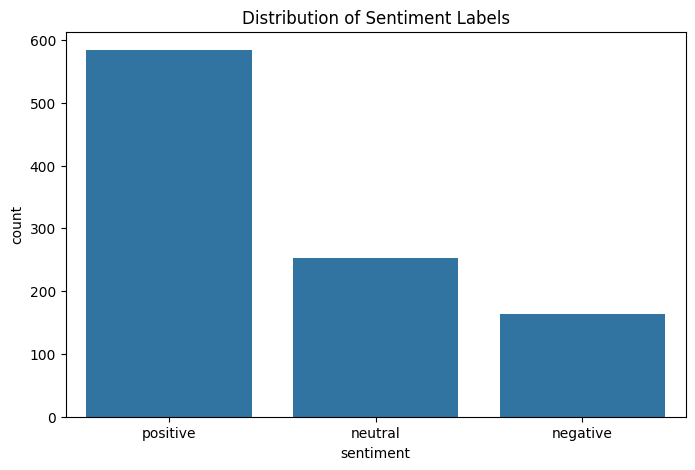

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiment Labels')
plt.show()

<ipython-input-13-14dc9fd5f696>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M', on='date').size().plot(kind='line')


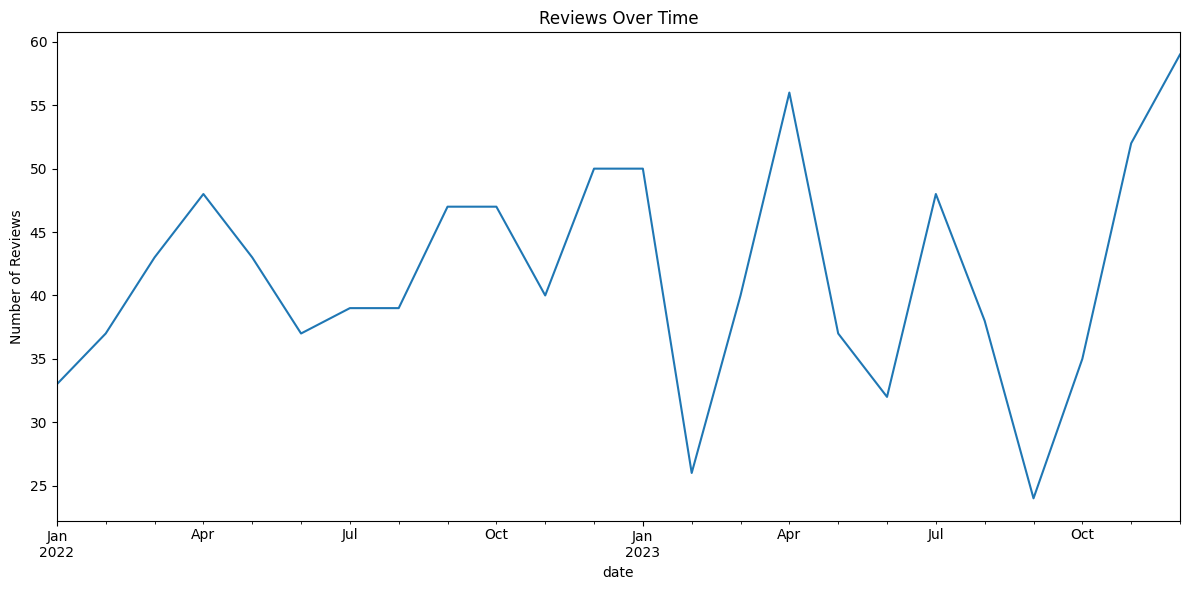

In [13]:
# Analysis the Distribution over time
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Plot reviews over time
plt.figure(figsize=(12, 6))
df.resample('M', on='date').size().plot(kind='line')
plt.title('Reviews Over Time')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.show()

## Checking the Review Column


We first check the legnth of review.Short reviews might not be meaningful in this case. We will count the no of words in the description column

In [29]:
df["words_in_review"] = df["review_text"].str.split().str.len()
df.head()

,review_id,product,category,rating,review_text,feature_mentioned,attribute_mentioned,date,sentiment,words_in_review
0,REV14165,TechPro X20,Smartphones,4,The TechPro X20 is amazing! facial recognition...,facial recognition,design,2023-03-09,positive,17
1,REV81426,TechPro X20,Smartphones,4,The TechPro X20 is amazing! battery life works...,battery life,design,2023-10-28,positive,17
2,REV54597,SmartWatch Pro,Wearables,4,The SmartWatch Pro is amazing! app integration...,app integration,durability,2023-03-09,positive,17
3,REV89131,SmartSpeaker 360,Smart Home,4,Very impressed with the SmartSpeaker 360. Grea...,app interface,connectivity,2022-12-19,positive,17
4,REV92397,HomeConnect Hub,Smart Home,4,Very impressed with the HomeConnect Hub. Great...,device compatibility,design,2022-10-28,positive,17


In [30]:
df["words_in_review"].describe()


,words_in_review
count,1000.0000
mean,17.2480
std,1.5972
min,13.0000
25%,16.0000
50%,17.0000
75%,18.0000
max,22.0000
